#  Regression on House Pricing Dataset: Variable Selection & Regularization
We consider a reduced version of a dataset containing house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

https://www.kaggle.com/harlfoxem/housesalesprediction

For each house we know 18 house features (e.g., number of bedrooms, number of bathrooms, etc.) plus its price, that is what we would like to predict.

## Insert your ID number ("numero di matricola") below

In [92]:
#put here your ``numero di matricola''
numero_di_matricola = 1 # COMPLETE

In [93]:
#import all packages needed
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load the data, remove data samples/points with missing values (NaN) and take a look at them.

In [94]:
#load the data
df = pd.read_csv('kc_house_data_reduced.csv', sep = ',')

#remove the data samples with missing values (NaN)
df = df.dropna() 

df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,3.000000e+02,3.000000e+02,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,4.526086e+09,5.115117e+05,3.333333,2.013333,2055.496667,14193.926667,1.421667,0.013333,0.220000,3.456667,7.586667,1705.020000,350.476667,1966.690000,93.236667,98074.943333,47.544087,-122.224943,1952.770000,12555.270000
std,2.887233e+09,3.419579e+05,0.843362,0.729392,885.183995,27184.787381,0.502200,0.114889,0.770441,0.680440,1.089240,743.761357,481.768276,28.290311,422.119640,52.884617,0.143289,0.134342,662.435198,19990.842449
min,1.151031e+07,1.530000e+05,1.000000,0.750000,700.000000,1044.000000,1.000000,0.000000,0.000000,1.000000,5.000000,580.000000,0.000000,1900.000000,0.000000,98001.000000,47.197600,-122.451000,830.000000,1106.000000
25%,1.944665e+09,3.039250e+05,3.000000,1.500000,1367.500000,5230.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1167.500000,0.000000,1949.000000,0.000000,98031.000000,47.427150,-122.339000,1450.000000,5075.000000
50%,3.795251e+09,4.300000e+05,3.000000,2.000000,1960.000000,8088.500000,1.000000,0.000000,0.000000,3.000000,7.000000,1545.000000,0.000000,1968.000000,0.000000,98059.000000,47.555950,-122.255000,1790.000000,7940.000000
75%,7.235338e+09,6.075000e+05,4.000000,2.500000,2480.000000,11216.250000,2.000000,0.000000,0.000000,4.000000,8.000000,2161.250000,650.000000,1988.250000,0.000000,98117.000000,47.676350,-122.148500,2332.500000,10391.750000
max,9.822700e+09,2.900000e+06,6.000000,4.750000,5420.000000,315374.000000,3.000000,1.000000,4.000000,5.000000,12.000000,5310.000000,2060.000000,2014.000000,2013.000000,98199.000000,47.773100,-121.711000,4760.000000,193842.000000


Extract input and output data. We want to predict the price by using features other than id as input.

In [95]:
Data = df.values
# m = number of input samples
m = Data.shape[0]
print("Amount of data:",m)
Y = Data[:m,2]
X = Data[:m,3:]
print(Y)

Amount of data: 300
[221900.0 538000.0 180000.0 604000.0 510000.0 1225000.0 257500.0 291850.0
 229500.0 323000.0 662500.0 468000.0 310000.0 400000.0 530000.0 650000.0
 395000.0 485000.0 189000.0 230000.0 385000.0 2000000.0 285000.0 252700.0
 329000.0 233000.0 937000.0 667000.0 438000.0 719000.0 580500.0 280000.0
 687500.0 535000.0 322500.0 696000.0 550000.0 640000.0 240000.0 605000.0
 625000.0 775000.0 861990.0 685000.0 309000.0 488000.0 210490.0 785000.0
 450000.0 1350000.0 228000.0 345000.0 600000.0 585000.0 920000.0 885000.0
 292500.0 301000.0 951000.0 430000.0 650000.0 289000.0 505000.0 549000.0
 425000.0 317625.0 975000.0 287000.0 204000.0 1325000.0 1040000.0 325000.0
 571000.0 360000.0 349000.0 832500.0 380000.0 480000.0 410000.0 720000.0
 390000.0 360000.0 355000.0 356000.0 315000.0 940000.0 305000.0 461000.0
 215000.0 335000.0 243500.0 1099880.0 153000.0 430000.0 700000.0 905000.0
 247500.0 199000.0 314000.0 437500.0 850830.0 555000.0 699950.0 1088000.0
 290000.0 375000.0 46000

## Data Pre-Processing

We split the data into 3 parts: one will be used for training and choosing the parameters, one for choosing among different models (validation data; we will discuss validation in detail in later lectures), and one for testing (used only at the end to estimate the final generalization error of models). The part for training and choosing the parameters will consist of $m_{train}=200$ samples, the one for choosing among different models will consist of $m_{val}=50$ samples, while the other part consists of $m_{test}=m - m_{traing} - m_{val}$ samples ($m$ is the total number of samples in the data).

In [96]:
# Split data into train (2/3 of samples), validation (1/6 of samples), and test data (the rest)
m_train = int(2./3.*m)
m_val = int((m-m_train)/2.)
m_test = m - m_train - m_val
print("Amount of data for training and deciding parameters:",m_train)
print("Amount of data for validation (choosing among different models):",m_val)
print("Amount of data for test:",m_test)
from sklearn.model_selection import train_test_split

Xtrain_and_val, Xtest, Ytrain_and_val, Ytest = train_test_split(X, Y, test_size=m_test/m, random_state=numero_di_matricola)
Xtrain, Xval, Ytrain, Yval = train_test_split(Xtrain_and_val, Ytrain_and_val, test_size=m_val/(m_train+m_val),random_state=numero_di_matricola )#split the train_and_val data into training and validation

Amount of data for training and deciding parameters: 200
Amount of data for validation (choosing among different models): 50
Amount of data for test: 50


Let's standardize the data.

In [97]:
# Data pre-processing
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(Xtrain)
Xtrain_scaled = scaler.transform(Xtrain) #scaled training data#scaled training data
Xtrain_and_val_scaled = scaler.transform(Xtrain_and_val)#scaled training and validation data
Xval_scaled = scaler.transform(Xval)#scaled validation data
Xtest_scaled = scaler.transform(Xtest)#scaled test data

## Least-Squares Solution

Now compute the Least-Squares estimate using LinearRegression() in Scikit-learn, and print the corresponding average loss in training and validation data.

Since the average loss can be quite high, we also compute the coefficient of determination $R^2$ and look at $1 - R^{2}$ to have an idea of what the average loss amounts to. To compute the coefficient of determination one can use the "score(...)" function.

In [98]:
# Least-Squares
from sklearn import linear_model 
#LR the linear regression model
LR = linear_model.LinearRegression()

#fit the model on training data
#COMPLETE
LR.fit(Xtrain_scaled, Ytrain)
#obtain predictions on training data
#COMPLETE
Ytrain_predicted = LR.predict(Xtrain_scaled)
#obtain predictions on validation data
#COMPLETE
Yval_predicted = LR.predict(Xval_scaled)
#coefficients from the model
w_LR = np.hstack((LR.intercept_, LR.coef_))

#average error in training data
loss_train = np.linalg.norm(Ytrain - Ytrain_predicted)**2/m_train#COMPLETE

#average error in val data
loss_val = np.linalg.norm(Yval - Yval_predicted)**2/m_val#COMPLETE

#print average loss in training data and in validation data
print("Average loss in training data:"+str(loss_train))
print("Average loss in validation data:"+str(loss_val))

#print 1 - coefficient of determination in training data and in validation data
print("1 - coefficient of determination on training data:"+str(1 - LR.score(Xtrain_scaled, Ytrain)))#COMPLETE)
print("1 - coefficient of determination on validation data:"+str(1 - LR.score(Xval_scaled, Yval)))#COMPLETE)

Average loss in training data:38132086868.98514
Average loss in validation data:43301817429.73467
1 - coefficient of determination on training data:0.26077348918724963
1 - coefficient of determination on validation data:0.6558122410766888


## Lasso

We use the routine *lasso_path* from *sklearn.linear_model* to compute the "lasso path" for different values of the regularization parameter $\lambda$. Computing the "lasso path" corresponds to finding the models with lasso for different values of the $\lambda$ parameter (which define the "path"). You should first fix a grid a possible values of lambda (the variable "lasso_lams"). For each entry of the vector "lasso_lams" we compute the corresponding model (the i-th column of the vector  "lasso_coefs" should contain the coefficients of the linear model computed using lasso_lams[i] as regularization parameter).

Note that, in general, the grid should be chosen appropriately.

Note that the parameter $\lambda$ is called $\alpha$ in the Lasso model from sklearn


In [99]:
from sklearn.linear_model import lasso_path

# select a grid of possible regularization parameters 
# (be carefull how this is chosen, you may have to refine the choice after having seen the results)

lasso_lams = np.logspace(0, 6, num=100 ) #COMPLETE

# Use the function lasso_path to compute the "lasso path", passing in input the lambda values
# you have specified in lasso_lams
lasso_lams, lasso_coefs, _ = lasso_path(Xtrain_scaled, Ytrain, alphas = lasso_lams) #COMPLETE

We evaluate the sparsity (i.e., number of non-zero coefficients) in the estimated coefficients as a function of the regularization parameter $\lambda$: to this purpose, we compute the number of non-zero entries in the estimated coefficient vector.

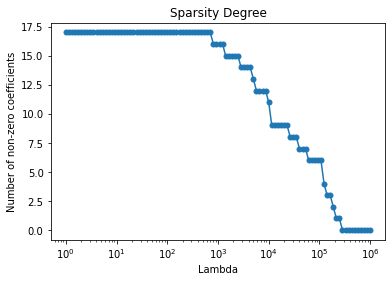

In [100]:
l0_coef_norm = np.zeros(len(lasso_lams),)

for i in range(len(lasso_lams)):
    l0_coef_norm[i] = sum(lasso_coefs[:,i]!=0)


plt.figure(6)
plt.plot(lasso_lams, l0_coef_norm, marker='o', markersize=5)
plt.xlabel('Lambda')
plt.ylabel('Number of non-zero coefficients')
plt.title('Sparsity Degree')
plt.xscale('log')
plt.show()

### Use k-fold Cross-Validation to fix the regularization parameter

Now we need to decide which value of $\lambda$ to use. In order to do this, we are going to use $k$-fold cross-validation.

We are going to use the scikit-learn built-in routine *Lasso* (from the *linear_model* package) to compute the lasso  coefficients.

We use *KFold* from *sklearn.model_selection* to split the data i.e. XtrainOLS and YtrainOLS) into the desired number of folds.

Then we pick $lasso\_lam\_opt$ to be the chosen value for the regularization parameter.

In [101]:
from sklearn.model_selection import KFold
num_folds = 5

kf = KFold(n_splits = num_folds)

#loss_ridge_kfold will contain the value of the loss
loss_lasso_kfold = np.zeros(len(lasso_lams),)

for i in range(len(lasso_lams)):
    #define a lasso model   using Lasso() for the i-th value of lam_values; pass as input the argument tol=0.05
    lasso_kfold = linear_model.Lasso(alpha=lasso_lams[i],  tol=0.05)
    for train_index, validation_index in kf.split(Xtrain_scaled):
        Xtrain_kfold, Xval_kfold = Xtrain_scaled[train_index], Xtrain_scaled[validation_index]# COMPLETE
        Ytrain_kfold, Yval_kfold = Ytrain[train_index], Ytrain[validation_index]# COMPLETE
    
        #learn the model using the training data from the k-fold
        lasso_kfold.fit(Xtrain_kfold, Ytrain_kfold)
        
        #compute the loss using the validation data from the k-fold
        loss_lasso_kfold[i] += np.linalg.norm(Yval_kfold - lasso_kfold.predict(Xval_kfold))**2/len(Yval_kfold)
    
loss_lasso_kfold /= num_folds


#choose the regularization parameter that minimizes the loss
lasso_lam_opt = lasso_lams[np.argmin(loss_lasso_kfold)]
#learn the model with the best choice for the regularization parameter
lasso_kfold = linear_model.Lasso(alpha=lasso_lam_opt)
lasso_kfold.fit(Xtrain_scaled, Ytrain)
print("Best value of the regularization parameter:", lasso_lam_opt)

Best value of the regularization parameter: 15199.11082952933


Let's plot the Cross-Validation estimates of the loss as a function of the regularization parameter.

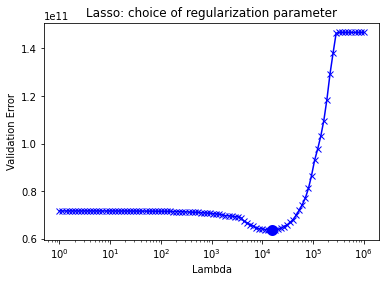

Total number of coefficients:18
Number of non-zero coefficients:9
Best value of regularization parameter:15199.11082952933


In [102]:
plt.figure(4)
plt.xscale('log')
plt.plot(lasso_lams, loss_lasso_kfold, color='b', marker='x')
plt.scatter(lasso_lams[np.argmin(loss_lasso_kfold)], loss_lasso_kfold[np.argmin(loss_lasso_kfold)], color='b', marker='o', linewidths=5)
plt.xlabel('Lambda')
plt.ylabel('Validation Error')
plt.title('Lasso: choice of regularization parameter')
plt.show()
print("Total number of coefficients:"+str(len(lasso_kfold.coef_)))
print("Number of non-zero coefficients:"+str(sum(lasso_kfold.coef_ != 0)))
print("Best value of regularization parameter:"+str(lasso_lam_opt))

## Now let's estimate the lasso coefficients using all the training data and the optimal regularization parameter (chosen at previous step)

Note that we use all the training data to learn the final model for the optimal regularization parameter (once we have chosen the parameter, there is no reason to use less data than what we have). We leave out only the test data so that we can later use it to estimate the generalization error.

In [103]:
# Estimate Lasso  Coefficients with all data (trainval) for the the optimal value lasso_lam_opt of the regularization paramter

#define the model
lasso_reg  = linear_model.Lasso(alpha=lasso_lam_opt)
#fit using the training data
lasso_reg.fit(Xtrain_scaled , Ytrain)

#average loss on training data
#COMPLETE
#average loss on validation data
#COMPLETE

#print average loss in training data and in validation data
# print("Average loss in training data:"+str(loss_train_lasso))
# print("Average loss in validation data:"+str(loss_val_lasso))

#now print 1-  the coefficient of determination on training and on validation data to get an idea to what the average
#loss corresponds to
print("1 - coefficient of determination on training data:"+str(1 - lasso_reg.score(Xtrain_scaled, Ytrain)))
print("1 - coefficient of determination on validation data:"+str(1 - lasso_reg.score(Xval_scaled, Yval)))

1 - coefficient of determination on training data:0.27460355444048834
1 - coefficient of determination on validation data:0.48902897673090384


## We now compare the coefficients from the LR model and the lasso model

Note that we do not plot the bias (that is not a coefficient of the features)

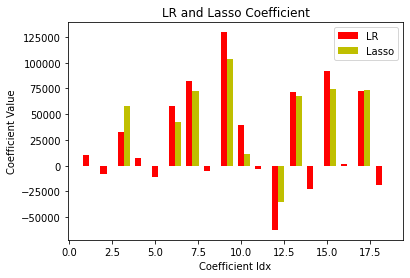

In [104]:
# Compare LR and lasso coefficients
ind = np.arange(1,len(LR.coef_)+1)  # the x locations for the groups
width = 0.35       # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(ind, LR.coef_, width, color='r')
rects2 = ax.bar(ind + width, lasso_reg.coef_, width, color='y')
ax.legend((rects1[0], rects2[0]), ('LR', 'Lasso'))
plt.xlabel('Coefficient Idx')
plt.ylabel('Coefficient Value')
plt.title('LR and Lasso Coefficient')
plt.show()

## Ridge Regression

### Use Ridge regression with cross-validation

We perform the L2 regularization for different values of the regularization parameter $\alpha$ (called $\lambda$ in class), and use the Scikit-learn function to perform cross-validation (CV).

In Ridge regression for scikit learn, the objective function is:

$$
    ||y - Xw||^2_2 + \alpha * ||w||^2_2
$$


Note: the CV in Scikit-learn is by default a *stratified* CV, that means that data is split into train-validation while maintaining the proportion of different classes in each fold.

In the code below:
- we use RidgeCV() to select the best value of $\alpha$ with a 5-fold CV with L2 penalty;
- we use Ridge() to learn the best model for the best $\alpha$ for ridge regression using the entire training set

Note that RidgeCV() picks some default values of $\alpha$ to try, but we decide to pass the same values used for the Lasso.




In [105]:
#let's define the values of alpha to use
ridge_alphas = np.logspace(0,  6 , num=100)#COMPLETE

#define the model using RidgeCV passing the vector of alpha values and the cv value (= number of folds)
ridge = linear_model.RidgeCV(alphas=ridge_alphas, cv=5)#COMPLETE

#fit the model on training data
ridge.fit(Xtrain_scaled, Ytrain)#COMPLETE

# the attribute 'alpha_' contains the best value of alpha as identified by cross-validation;
# let's print it

print("Best value of parameter alpha according to 5-fold Cross-Validation: "+str(ridge.alpha_))

#define the model using the best alpha; note that various solvers are availalbe, choose
# an appropriate one
ridge_final = linear_model.Ridge(alpha=ridge.alpha_, solver = 'svd')#COMPLETE

#fit the model using the best C on the entire training set
ridge_final.fit(Xtrain_scaled, Ytrain)#COMPLETE

# #average loss on training data
# loss_train_ridge = #COMPLETE
# #average loss on validation data
# loss_val_ridge = #COMPLETE

# #print average loss in training data and in validation data
# print("Average loss in training data:"+str(loss_train_ridge))
# print("Average loss in validation data:"+str(loss_val_ridge))

#now print 1-  the coefficient of determination on training and on validation data to get an idea to what the average
#loss corresponds to
print("1 - coefficient of determination on training data:"+str(1 - ridge_final.score(Xtrain_scaled, Ytrain)))
print("1 - coefficient of determination on validation data:"+str(1 - ridge_final.score(Xval_scaled, Yval)))

Best value of parameter alpha according to 5-fold Cross-Validation: 100.0
1 - coefficient of determination on training data:0.2926152648478946
1 - coefficient of determination on validation data:0.4252230623585155


## We now compare the coefficient from the LR model, the lasso model, and the ridge model

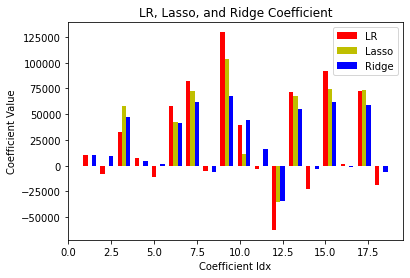

In [106]:
# Compare LR and lasso coefficients
ind = np.arange(1,len(LR.coef_)+1)  # the x locations for the groups
width = 0.25       # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(ind, LR.coef_, width, color='r')
rects2 = ax.bar(ind + width, lasso_reg.coef_, width, color='y')
rects3 = ax.bar(ind + 2*width, ridge_final.coef_, width, color='b')
ax.legend((rects1[0], rects2[0], rects3[0]), ('LR', 'Lasso', 'Ridge'))
plt.xlabel('Coefficient Idx')
plt.ylabel('Coefficient Value')
plt.title('LR, Lasso, and Ridge Coefficient')
plt.show()

## Now use all data but the test one to learn the best model (using the chosen model class and parameter, if any), and estimate its generalization error on the test data

In [107]:
#compute best LR model on training and validation data
LR.fit(Xtrain_and_val_scaled, Ytrain_and_val)#COMPLETE

#compute and print 1 - coefficient of determination for the best LR model
print("1 - coefficient of determination of LR on test data :"+str(1 - LR.score(Xtest_scaled, Ytest)))

#compute best lasso_reg model on training and validation data
lasso_reg = linear_model.Lasso(alpha=lasso_lam_opt)
lasso_reg.fit(Xtrain_and_val_scaled, Ytrain_and_val)

#compute and print 1 - coefficient of determination for the best lasso model
print("1 - coefficient of determination of lasso on test data :"+str(1 - lasso_reg.score(Xtest_scaled, Ytest)))

#compute best ridge model on training and validation data
ridge_final = linear_model.Ridge(alpha= ridge.alpha_, solver = 'svd')
ridge_final.fit(Xtrain_and_val_scaled, Ytrain_and_val)

#compute and print 1 - coefficient of determination for the best ridge model
print("1 - coefficient of determination of ridge on test data :"+str(1 - ridge_final.score(Xtest_scaled, Ytest)))


1 - coefficient of determination of LR on test data :0.3244745505278881
1 - coefficient of determination of lasso on test data :0.2333587487770935
1 - coefficient of determination of ridge on test data :0.2504665396289423


## Now we use other data (from the future!) to see which model really works well

In [108]:
#load the data
df = pd.read_csv('kc_house_data_future.csv', sep = ',')

#remove the data samples with missing values (NaN)
df = df.dropna() 

df.describe()

Data = df.values
# m = number of input samples
m_future = Data.shape[0]
print(m_future)
Yfuture = Data[:m_future,2]
Xfuture = Data[:m_future,3:]

Xfuture_scaled = scaler.transform(Xfuture)

#compute and print 1 - coefficient of determination for the best LR model
print("1 - coefficient of determination of LR on future data :"+str(1 - LR.score(Xfuture_scaled,Yfuture)))

#compute and print 1 - coefficient of determination for the best lasso model
print("1 - coefficient of determination of lasso on future data :"+str(1 - lasso_reg.score(Xfuture_scaled,Yfuture)))

#compute and print 1 - coefficient of determination for the best ridge model
print("1 - coefficient of determination of ridge on future data :"+str(1 - ridge_final.score(Xfuture_scaled,Yfuture)))

2864
1 - coefficient of determination of LR on future data :0.3316928869710184
1 - coefficient of determination of lasso on future data :0.3391230955798671
1 - coefficient of determination of ridge on future data :0.33958475595237103
